# **Exploring the Trafic Sign Data Set**

In [7]:
import sys

assert sys.version_info >= (3, 7)

In [8]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [10]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# DATASET

In [11]:
import pandas as pd

x_train_all = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
y_train_all = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
x_test_all = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_test_all.csv')
y_test_all = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_test_all.csv')

In [12]:
x_train_all.keys()  

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2294', '2295', '2296', '2297', '2298', '2299', '2300', '2301', '2302',
       '2303'],
      dtype='object', length=2304)

In [13]:
X,Y = x_train_all,y_train_all
X

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [14]:
X.shape


(9690, 2304)

(array([[2019., 2556., 1434., ...,  282.,  263., 1152.],
        [2040., 2516., 1454., ...,  267.,  254., 1165.],
        [2024., 2543., 1452., ...,  237.,  265., 1164.],
        ...,
        [2945., 2805., 1389., ...,  163.,  174.,  558.],
        [2962., 2800., 1409., ...,  172.,  178.,  540.],
        [2974., 2807., 1413., ...,  177.,  170.,  535.]]),
 array([  3. ,  28.2,  53.4,  78.6, 103.8, 129. , 154.2, 179.4, 204.6,
        229.8, 255. ]),
 <a list of 2304 BarContainer objects>)

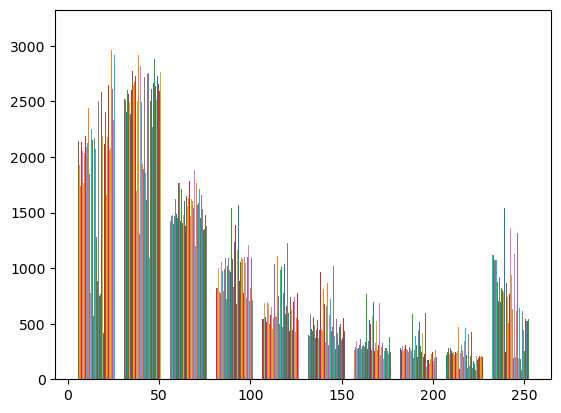

In [15]:
#X.hist(bins=50, figsize=(20,15))
import matplotlib.pyplot as plt
plt.hist(X)

In [16]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
9685,9
9686,9
9687,9
9688,9


In [17]:
Y.shape

(9690, 1)

In [18]:
28 * 28

784

In [19]:
import numpy as np
X=np.reshape(np.array(X), (9690,48,48))
X

array([[[ 78.,  77.,  76., ...,  68.,  67.,  67.],
        [ 81.,  79.,  78., ...,  72.,  72.,  72.],
        [ 84.,  83.,  81., ...,  77.,  78.,  79.],
        ...,
        [ 98.,  99., 100., ..., 109., 104., 101.],
        [ 90.,  94., 100., ..., 103., 100.,  97.],
        [ 85.,  92., 102., ...,  98.,  95.,  94.]],

       [[ 73.,  75.,  79., ...,  76.,  72.,  68.],
        [ 71.,  74.,  78., ...,  78.,  73.,  69.],
        [ 69.,  72.,  76., ...,  80.,  74.,  70.],
        ...,
        [105., 105., 105., ...,  92., 100., 106.],
        [ 87.,  89.,  91., ...,  97., 102., 104.],
        [ 74.,  77.,  83., ..., 100., 101., 101.]],

       [[ 72.,  75.,  79., ...,  76.,  70.,  65.],
        [ 70.,  73.,  77., ...,  78.,  73.,  69.],
        [ 68.,  71.,  76., ...,  79.,  76.,  74.],
        ...,
        [119., 116., 113., ...,  79.,  86.,  92.],
        [ 95.,  96.,  98., ...,  80.,  88.,  94.],
        [ 77.,  81.,  86., ...,  80.,  89.,  95.]],

       ...,

       [[255., 255., 255

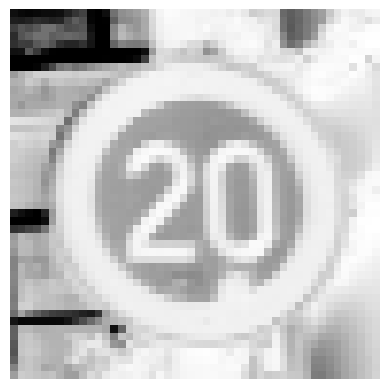

In [20]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(48, 48)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_sign = X[209]
plot_digit(some_sign)
#save_fig("some_digit_plot")  # extra code
plt.show()

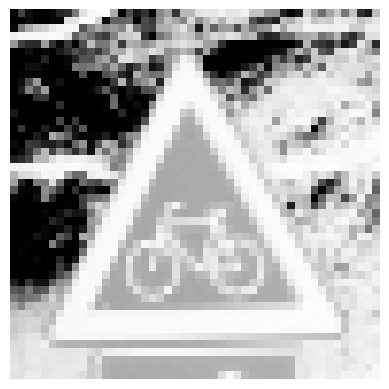

In [306]:
some_sign = X[2432]
plot_digit(some_sign)
plt.show()

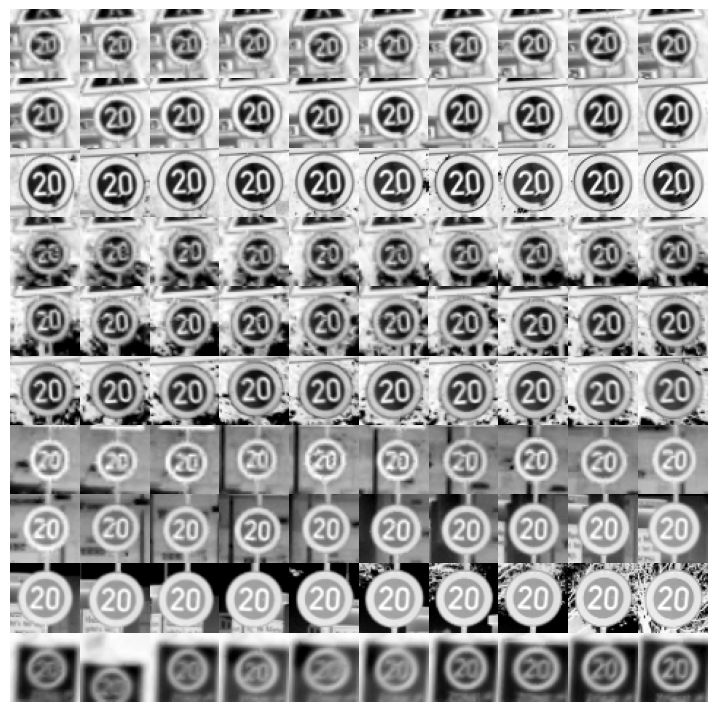

In [23]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [24]:
#draww histogram

In [25]:
mean_im = np.mean(X, axis=0)
print(mean_im.shape)

(48, 48)


In [26]:
median_im = np.median(X, axis=0)
print(median_im.shape)

(48, 48)


(array([[ 0., 18., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 19., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 19., 14., 15.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 18., 15., 15.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 17., 14., 17.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 16., 10., 22.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 14., 14., 20.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 20., 10., 18.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 26.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3., 28.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4., 28.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4., 20., 12., 11.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 3., 19.,  6., 13.,  7.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 18.,  6., 11.,  7.,  6.,  0.,  0.,  0.,  0.],
        [ 0., 16.,  4., 10., 10.,  2.,  6.,  0.,  0.,  0.],
        [ 0., 15.,  4.,  7., 13.,  2.,  5.,  2.,  0.,  0.],
        [ 2., 12.,  3.,  6., 12.,  5.,  

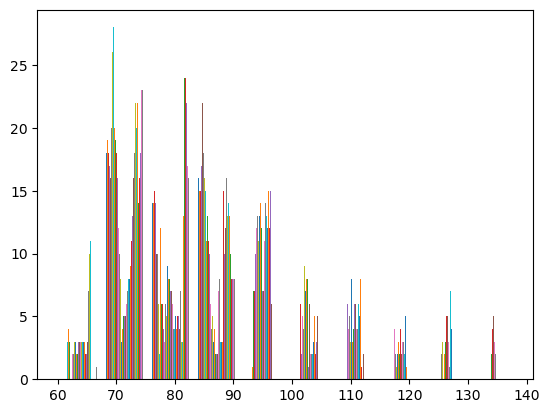

In [27]:
plt.hist(mean_im)

(array([[29., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [27., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [22., 26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [19., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [16., 32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [14., 34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11., 36.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [20., 27.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [22., 25.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10., 36.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11., 29.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 9., 22., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 6., 21., 12.,  4.,  5.,  0.,  0.,  0.,  0.,  0.],
        [ 5., 16., 14.,  5.,  3.,  5.,  0.,  0.,  0.,  0.],
        [ 6., 14., 11.,  4.,  5.,  5.,  3.,  0.,  0.,  0.],
        [ 6., 11., 12.,  4.,  6.,  5.,  

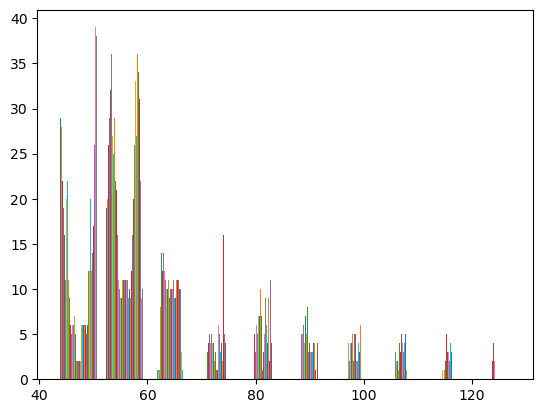

In [28]:
median_im = np.median(X, axis=0)
plt.hist(median_im)

In [29]:
# majority of mean and median values of the pixel lies between 50 and 95.

In [30]:
X

array([[[ 78.,  77.,  76., ...,  68.,  67.,  67.],
        [ 81.,  79.,  78., ...,  72.,  72.,  72.],
        [ 84.,  83.,  81., ...,  77.,  78.,  79.],
        ...,
        [ 98.,  99., 100., ..., 109., 104., 101.],
        [ 90.,  94., 100., ..., 103., 100.,  97.],
        [ 85.,  92., 102., ...,  98.,  95.,  94.]],

       [[ 73.,  75.,  79., ...,  76.,  72.,  68.],
        [ 71.,  74.,  78., ...,  78.,  73.,  69.],
        [ 69.,  72.,  76., ...,  80.,  74.,  70.],
        ...,
        [105., 105., 105., ...,  92., 100., 106.],
        [ 87.,  89.,  91., ...,  97., 102., 104.],
        [ 74.,  77.,  83., ..., 100., 101., 101.]],

       [[ 72.,  75.,  79., ...,  76.,  70.,  65.],
        [ 70.,  73.,  77., ...,  78.,  73.,  69.],
        [ 68.,  71.,  76., ...,  79.,  76.,  74.],
        ...,
        [119., 116., 113., ...,  79.,  86.,  92.],
        [ 95.,  96.,  98., ...,  80.,  88.,  94.],
        [ 77.,  81.,  86., ...,  80.,  89.,  95.]],

       ...,

       [[255., 255., 255

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
datatype = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
X1 = data.iloc[:,0:2304]  #independent columns
y1 = datatype.iloc[:,-1]    #target column i.e price range
X1
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [202]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScoresAll5 = featureScores.nlargest(5,'Score')
featureScoresAll10 = featureScores.nlargest(10,'Score')
featureScoresAll20 = featureScores.nlargest(20,'Score')
featureScoresAll100 = featureScores.nlargest(100,'Score')
featureScoresAll10

,Specs,Score
1263,1263,150633.369191
1264,1264,148051.674998
1216,1216,144958.677289
1311,1311,144287.318409
1215,1215,140869.000438
1168,1168,136870.402181
1312,1312,134552.189285
1310,1310,131485.851171
1121,1121,129990.460474
1262,1262,129791.235186


array([[<Axes: title={'center': '1263'}>]], dtype=object)

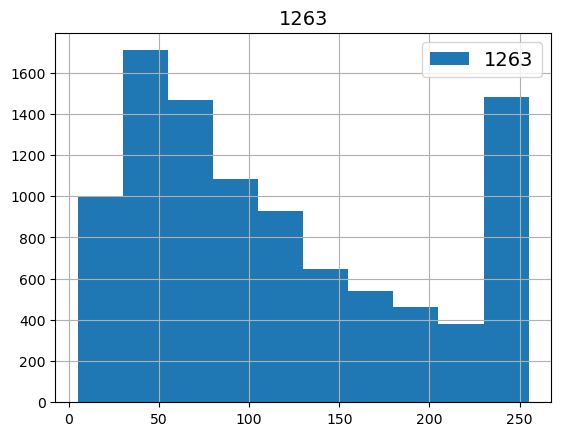

In [33]:
data.hist(column='1263',legend=True)

array([[<Axes: title={'center': '0'}>]], dtype=object)

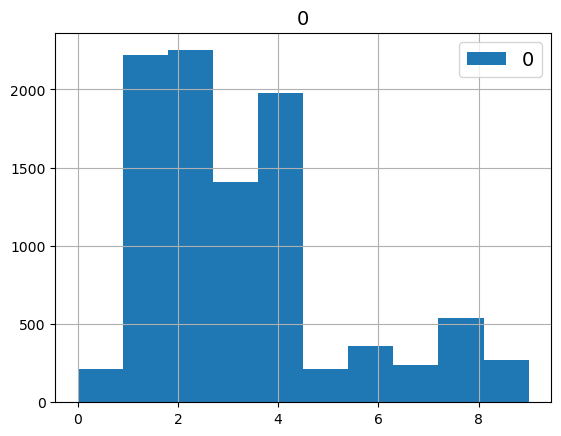

In [34]:
datatype.hist(legend=True)

In [35]:
#above histograms shows more samplee present for type 1,2,3and 4 types of images

In [255]:
X20 = X[0:211]

In [256]:
X_train, X_test, y_train, y_test = X, x_test_all, Y, y_test_all

# Gaussian Naive Bayes

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import precision_score, recall_score,f1_score

In [258]:
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
Y =  np.ravel(Y,order='C')
Y
nsamples, nx, ny = X.shape
d2_train_dataset = X.reshape((nsamples,nx*ny))

In [259]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]:
           TP += 1
        if y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]:
           TN += 1
        if y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP / (TP+FN), FP/(FP+TN))

In [292]:
def run_gaussian_nb(d2_train_dataset, Y):
	X_train, X_test, y_train, y_test = train_test_split(d2_train_dataset, Y, test_size=0.25, random_state=0)
	gnb1 = GaussianNB()
	y_pred = gnb1.fit(X_train, y_train).predict(X_test)
	print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

	mean(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

	# Model Accuracy, how often is the classifier correct?
	print("Accuracy: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
	tprate, fprate = (perf_measure(y_test, y_pred))
	print(f'The given data set with Gaussian Naive Bayes has TP Rate {tprate} and FP Rate {fprate}')


	pscore = precision_score(y_test, y_pred,  average='weighted', labels=np.unique(y_test))
	rscore = recall_score(y_test, y_pred, average='weighted')
	f1score = f1_score(y_test, y_pred,  average='weighted')
	print(f'The given data set with Gaussian Naive Bayes has Precision Score {pscore} Recall Score {rscore} and F1 Score {f1score}')
    
    

In [293]:
run_gaussian_nb(d2_train_dataset,Y)

Number of mislabeled points out of a total 2423 points : 1884
Accuracy: 0.222
The given data set with Gaussian Naive Bayes has TP Rate 0.2224515063970285 and FP Rate 0.7775484936029715
The given data set with Gaussian Naive Bayes has Precision Score 0.3879120986371686 Recall Score 0.2224515063970285 and F1 Score 0.24444976221217007


In [294]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(d2_train_dataset, Y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [295]:
y_pred = gnb.fit(d2_train_dataset, Y).predict(X_test)
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn import metrics

mean(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

0.22801678640501888

In [296]:
tprate, fprate = (perf_measure(y_test, y_pred))
print(f'The full data set with Gaussian Naive Bayes has TP Rate {tprate} and FP Rate {fprate}')

The full data set with Gaussian Naive Bayes has TP Rate 0.22905489063144863 and FP Rate 0.7709451093685514


Text(113.9222222222222, 0.5, 'predicted label')

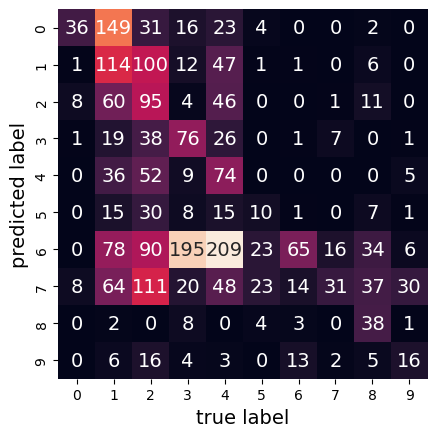

In [297]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Gaussian Naive Bayes with Best Features

In [298]:
def get_best_feature_dataframe(index_X, data):
    arr = index_X.to_numpy()[:,0]    
    return data.loc[:,arr]

In [299]:
feature_df = get_best_feature_dataframe(featureScoresAll10,data)
run_gaussian_nb(feature_df.to_numpy(),Y)

Number of mislabeled points out of a total 2423 points : 1824
Accuracy: 0.247
The given data set with Gaussian Naive Bayes has TP Rate 0.247214197276104 and FP Rate 0.752785802723896
The given data set with Gaussian Naive Bayes has Precision Score 0.3964025378727234 Recall Score 0.247214197276104 and F1 Score 0.221596024065487


In [300]:
feature_df = get_best_feature_dataframe(featureScoresAll5,data)
run_gaussian_nb(feature_df.to_numpy(),Y)

Number of mislabeled points out of a total 2423 points : 1712
Accuracy: 0.293
The given data set with Gaussian Naive Bayes has TP Rate 0.293437886917045 and FP Rate 0.706562113082955
The given data set with Gaussian Naive Bayes has Precision Score 0.22735482177653166 Recall Score 0.293437886917045 and F1 Score 0.22625468736872456


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [301]:
feature_df = get_best_feature_dataframe(featureScoresAll20,data)
run_gaussian_nb(feature_df.to_numpy(),Y)

Number of mislabeled points out of a total 2423 points : 1912
Accuracy: 0.211
The given data set with Gaussian Naive Bayes has TP Rate 0.21089558398679323 and FP Rate 0.7891044160132068
The given data set with Gaussian Naive Bayes has Precision Score 0.422017172098275 Recall Score 0.21089558398679323 and F1 Score 0.20287958128913047


In [302]:
feature_df = get_best_feature_dataframe(featureScoresAll100,data)
run_gaussian_nb(feature_df.to_numpy(),Y)

Number of mislabeled points out of a total 2423 points : 1873
Accuracy: 0.227
The given data set with Gaussian Naive Bayes has TP Rate 0.22699133305819233 and FP Rate 0.7730086669418077
The given data set with Gaussian Naive Bayes has Precision Score 0.3410726832498027 Recall Score 0.22699133305819233 and F1 Score 0.20615229329413615


In [51]:
from sklearn.model_selection import cross_val_score
from statistics import mean 
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,f1_score

mean(cross_val_score(gnb, X_train, y_train, cv=5, scoring="accuracy"))

0.22801678640501888

# Multinomial Naive Bayes

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
mnnb = MultinomialNB()
model = make_pipeline(TfidfVectorizer(), mnnb)

In [56]:
X_train_Str = list(map(str,X_train))
Y_train_Str = list(map(str,y_train))
X_test_Str =  list(map(str,X_test))
Y_test_Str =  list(map(str,y_test))

In [57]:
model.fit(X_train_Str,Y_train_Str)
labels = model.predict(X_test_Str)
labels

array(['2', '3', '1', ..., '4', '1', '4'], dtype='<U1')

Text(113.9222222222222, 0.5, 'predicted label')

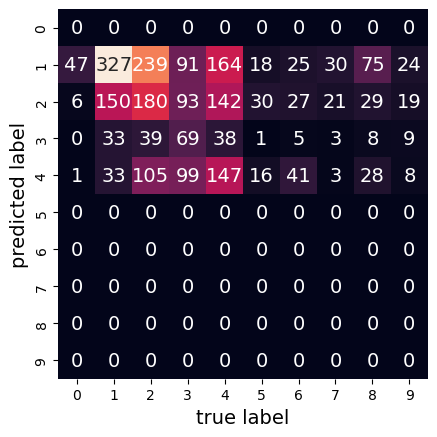

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(Y_test_Str, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
## Measuring Accuracy Using Cross-Validation

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statistics import mean 

mean(cross_val_score(mnnb, X_train, y_train, cv=5, scoring="accuracy"))


0.34539997406116074

In [61]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.3}".format(metrics.accuracy_score(Y_test_Str, labels)))

Accuracy: 0.298


In [62]:
from sklearn.metrics import precision_score, recall_score,f1_score
pscore = precision_score(Y_test_Str, labels,  average='weighted', labels=np.unique(labels))
rscore = recall_score(Y_test_Str, labels, average='weighted')
f1score = f1_score(Y_test_Str, labels,  average='weighted')
print(f'The full data set with Multinomial Naive Bayes has Precision Score {pscore} Recall Score {rscore} and F1 Score {f1score}')

The full data set with Multinomial Naive Bayes has Precision Score 0.2999797130164081 Recall Score 0.29839042509286007 and F1 Score 0.25625850174328435


In [63]:
Y_test_Array = np.array(Y_test_Str)
labels

array(['2', '3', '1', ..., '4', '1', '4'], dtype='<U1')

In [65]:
tprate, fprate = (perf_measure(Y_test_Str, labels))

In [66]:
print(f'The full data set with Multinomial Naive Bayes has TP Rate {tprate} and FP Rate {fprate}')

The full data set with Multinomial Naive Bayes has TP Rate 0.29839042509286007 and FP Rate 0.7016095749071399


# Extended Learning - Multi Class Classification with KNeighborsClassifier

In [67]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import argparse

In [75]:
(trainRI, testRI, trainRL, testRL) = train_test_split(
	d2_train_dataset, Y, test_size=0.25, random_state=42)
print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier()
model.fit(trainRI, trainRL)
acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 87.78%


In [78]:
#model.fit(X_train_Str,Y_train_Str)
labels = model.predict(X_test)
labels

array([2, 3, 7, ..., 3, 1, 4], dtype=int64)

In [81]:
meancv = mean(cross_val_score(model, trainRI, trainRL, cv=5, scoring="accuracy"))
print("Mean Cross Validation Score: {:.3}".format(meancv))

Mean Cross Validation Score: 0.845


In [84]:
labelsKN = model.predict(testRI)
print("Accuracy: {:.3}".format(metrics.accuracy_score(testRL, labelsKN)))

Accuracy: 0.878


In [89]:
pscore = precision_score(testRL, labelsKN,  average='weighted', labels=np.unique(labelsKN))
rscore = recall_score(testRL, labelsKN, average='weighted')
f1score = f1_score(testRL, labelsKN,  average='weighted')
print(f'The full data set with k-NN classifer has Precision Score {pscore} Recall Score {rscore} and F1 Score {f1score}')
print('--------------------------------------------------------')
tprate, fprate = (perf_measure(testRL, labelsKN))
print(f'The full data set with k-NN classifer has TP Rate {tprate} and FP Rate {fprate}')

The full data set with k-NN classifer has Precision Score 0.879446208349236 Recall Score 0.8778373916632274 and F1 Score 0.8778154753002685
--------------------------------------------------------
The full data set with k-NN classifer has TP Rate 0.8778373916632274 and FP Rate 0.1221626083367726


Text(113.9222222222222, 0.5, 'predicted label')

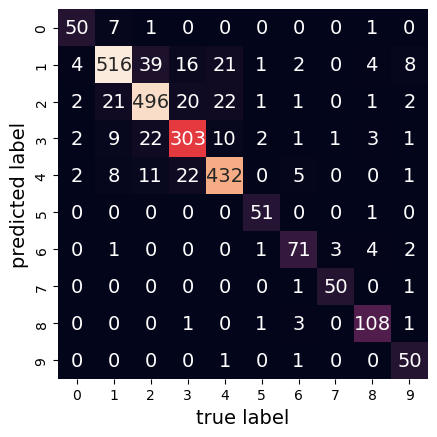

In [90]:
mat = confusion_matrix(testRL, labelsKN)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')